# DS 3000 - Assignment 4

**Student Name**: [Jacob Jawharjian]

**Date**: [2/5/2023]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from February 2020 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [1]:
#run this cell to install the fast parquet library
!pip install fastparquet

In [2]:
import pandas as pd

## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [3]:
#let's load the data into a dataframe

tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet', #provide the URL to the data source
                      engine = 'fastparquet')


#Note: you'll notice two new things. 1) We are using a new function called `read_parquet()` which indicates that we are 
#      reading data in parquet format. 2) We used the fastparquet library as the engine. 
#      That's it! Pandas will load the data into a dataframe. You can now use the dataframe for EDA.

# Reminder: How does Pandas read other file formats?
# 1. Excel files: pd.read_excel()
# 2. CSV Files: pd.read_csv()
# ... and now you know how to read parquet files using pd.read_parquet()


## 2. Inspect the Data (3 pts) 
Inspect the data to: 1) identify its dimensions, and 2) indicate if the variables have suitable types.

In [4]:
tripdata_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2020-02-01 00:10:25,2020-02-01 00:14:34,N,1.0,74,41,1.0,0.76,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
1,2,2020-02-01 00:16:59,2020-02-01 00:21:35,N,1.0,74,74,1.0,0.72,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,1.0,1.0,0.0
2,2,2020-02-01 00:19:31,2020-02-01 00:25:29,N,1.0,223,7,1.0,0.89,6.0,0.5,0.5,1.82,0.0,NaN,0.3,9.12,1.0,1.0,0.0
3,2,2020-02-01 00:43:52,2020-02-01 00:48:58,N,1.0,145,145,1.0,1.12,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
4,2,2020-02-01 00:32:53,2020-02-01 00:35:19,N,1.0,166,166,1.0,0.65,4.0,0.5,0.5,1.06,0.0,NaN,0.3,6.36,1.0,1.0,0.0


In [5]:
print('There are {} rows and {} columns.'.format(tripdata_df.shape[0], tripdata_df.shape[1]))
tripdata_df.info()


There are 398632 rows and 20 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398632 entries, 0 to 398631
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               398632 non-null  int64         
 1   lpep_pickup_datetime   398632 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  398632 non-null  datetime64[ns]
 3   store_and_fwd_flag     317739 non-null  object        
 4   RatecodeID             317739 non-null  float64       
 5   PULocationID           398632 non-null  int64         
 6   DOLocationID           398632 non-null  int64         
 7   passenger_count        317739 non-null  float64       
 8   trip_distance          398632 non-null  float64       
 9   fare_amount            398632 non-null  float64       
 10  extra                  398632 non-null  float64       
 11  mta_tax                398632 non-null  float64       
 12  tip_am

- passenger_count should be an integer
- trip_type should be an integer
- payment_type should be an integer

## 3. Missing Values (5 pts) 
Evaluate the frequency of missing values in the dataset. Are missing values an isolated case or a widespread issue? What method would you recommend to handle missing data?

In [6]:
tripdata_df.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        80893
RatecodeID                80893
PULocationID                  0
DOLocationID                  0
passenger_count           80893
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                398632
improvement_surcharge         0
total_amount                  0
payment_type              80893
trip_type                 80894
congestion_surcharge      80893
dtype: int64

The missing values seem to be widespread but observably patterned within a handful of columns (store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type, congestion_surcharge) and seem to be related to one another. Where there is a missing value in one of these columns, there are missing values across all of them. In addition to the columns listed above, the ehail_fee column is missing all of its values. 

In [7]:
tripdata_df.isnull().sum(axis=1).sort_values(ascending=False)

398631    7
344706    7
344699    7
344700    7
344701    7
         ..
132875    1
132874    1
132873    1
132872    1
199316    1
Length: 398632, dtype: int64

In the case of of ehail_fee, I would recommend deleting the column entirely as there is no usable data their and therefore the data column is totally unsalvageable. I would further inspect each of the six remaining columns to determine if the trend in missing data can be better understood, and make a decision on how to proceed once I've done that.

In [8]:
tripdata_df['store_and_fwd_flag'].value_counts(dropna=False)

N       316829
None     80893
Y          910
Name: store_and_fwd_flag, dtype: int64

My recommendation for this column would be to reassign the missing data ("None") to the "N" attribute because it is significantly more prevalent than the "Y" attribute.

In [9]:
tripdata_df['RatecodeID'].value_counts(dropna=False)

1.0     309477
NaN      80893
5.0       7246
2.0        620
4.0        263
3.0        130
99.0         2
6.0          1
Name: RatecodeID, dtype: int64

I would recommend NaN be reassigned to 1.0

In [10]:
tripdata_df['passenger_count'].value_counts(dropna=False)

1.0    273447
NaN     80893
2.0     23121
5.0      9178
3.0      4927
6.0      4809
4.0      1775
0.0       465
7.0         9
8.0         8
Name: passenger_count, dtype: int64

I would recommend NaN be reassigned to 1.0

In [11]:
tripdata_df['payment_type'].value_counts(dropna=False)

1.0    176530
2.0    138849
NaN     80893
3.0      1767
4.0       579
5.0        14
Name: payment_type, dtype: int64

I would assign NaN to 5.0 as this column represents payment types unknown.

In [12]:
tripdata_df['trip_type'].value_counts(dropna=False)

1.0    310466
NaN     80894
2.0      7272
Name: trip_type, dtype: int64

I would assign NaN to 1.0

In [13]:
tripdata_df['congestion_surcharge'].value_counts(dropna=False)

0.00    263467
NaN      80893
2.75     54205
2.50        66
0.75         1
Name: congestion_surcharge, dtype: int64

I would assign NaN to 0.00

## 4. Types of Data (5 pts) 
Are there any categorical data in this dataset. If they exist, identify at least two variables and indicate if  they are nominal or ordinal (hint: read the data dictionary above which describes all field in the data)

The following columns represent categorical data: VenderID (nominal), RatecodeID (nominal), store_and_fwd_flag (nominal), payment_type (nominal), extra (nominal), trip_type (nominal). There is no ordinal data in this set. 

## 5. Invalid Data (5 pts) 
Explore the data to determine if there are any invalid values. Demonstrate at least three issues that you found.

The code for this was carried out in the Missing Values section. Three issues that were found were 1) 80,893 data points under congestion_surcharge were 'Not a Number'. 2) 80,893 data points under passenger_count were 'Not a Number'. 3) None of the data points under ehail_fee were valid, and thus all of them were 'Not a Number'.

## 6. Data Preparation (15 pts) 
Based on the issues that you identified in questions 2, 3 & 5 above, perform the appropriate steps to clean the data and prepare the data for analysis. 


In [14]:
#get rid of the ehail_fee column
tripdata_df.drop(columns=['ehail_fee'])

#change the null data to their recommended designations
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].fillna('N')
tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].fillna(1.0)
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].fillna(1.0)
tripdata_df['payment_type'] = tripdata_df['payment_type'].fillna(5.0)
tripdata_df['trip_type'] = tripdata_df['trip_type'].fillna(1.0)
tripdata_df['congestion_surcharge'] = tripdata_df['congestion_surcharge'].fillna(0.0)

#now that the designations of each data point per colum are suitable, changen to the correct data type 
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype(int)
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype(int)
tripdata_df['trip_type'] = tripdata_df['trip_type'].astype(int)



## 7. Data Analysis (10 pts)
Answer the following question using the prepared data. What is the most expensive and least expensive trip in this dataset and how far did they travel? Explain the results.

In [15]:
#most expensive trip (not considering tips)
print('The most expensive trip cost: ')
print(tripdata_df['fare_amount'].max())
tripdata_df[['fare_amount']].idxmax()

print("The most expensive trip's distance: ")
print(tripdata_df['trip_distance'][15818])

#least expensive trip (not considering tips)
print('The least expensive trip cost: ')
print(tripdata_df['fare_amount'].min())
tripdata_df[['fare_amount']].idxmin()

print("The least expensive trip's distance: ")
print(tripdata_df['trip_distance'][12341])


The most expensive trip cost: 
458.0
The most expensive trip's distance: 
5.03
The least expensive trip cost: 
-150.0
The least expensive trip's distance: 
0.0


## 8. Data Visualization (5 pts) 
Create bar charts that show: 1) the most common way that New Yorkers request/hail a cab and 2) the most common drop-off location (display the top 5 locations). Explain the charts.

<AxesSubplot:>

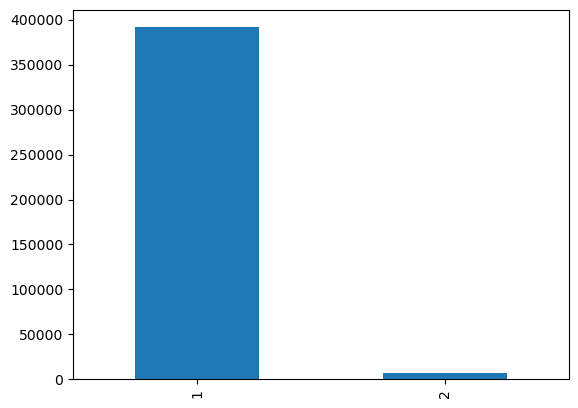

In [17]:
cab_request = tripdata_df['trip_type'].value_counts()
cab_request.plot(kind='bar')

This plot demonstrates the most common way that New Yorker's hail a cab. According to the data frame, "1" on the x-axis represents street-hailing a cab, while "2" represents dispatching a cab. As shown, street-hailing is the predominant method of requesting a cab.

<AxesSubplot:>

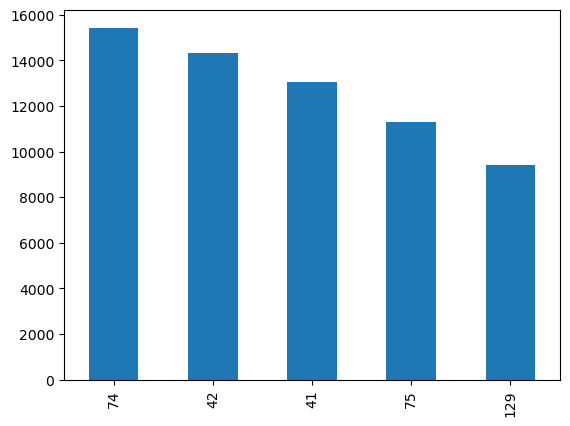

In [19]:
dropoff_location_bar = tripdata_df['DOLocationID'].value_counts().head(5)
dropoff_location_bar.plot(kind='bar')

This plot shows the 5 most common dropoff locations for New York cab-riders. Each of the x-axis labels is a code for a certain location.

## 9. Findings (2 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

I would say that this data is a viable source that can be used by a team in the future to understand how New Yorkers use these taxis. The data that was missing was not overwhelming, and by reassigning the missing data's values, the results were not considerably skewed. This data is sufficient to draw conclusions from for each of its columns except for "ehail_fee".